In [1]:
# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing tha data
import pandas as pd
dataset = pd.read_csv('Diabetes data.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.isnull().sum() # For null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
x = dataset.iloc[:,:-1]  # Data except last column
y = dataset.iloc[:,-1] # last column in data
x.head()  # First n rows of the dataset or 5 by default

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
dataset.corr() # Calculating the relationship between each column in dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

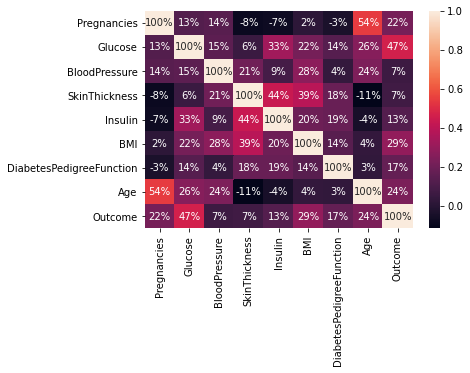

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr(),fmt ='.0%',annot = True)            # colored visual summary of information

<AxesSubplot:xlabel='Outcome', ylabel='count'>

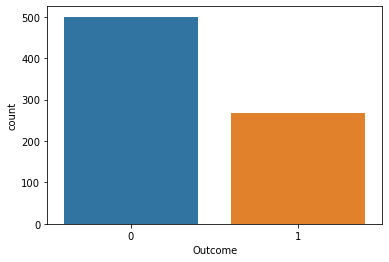

In [7]:
sns.countplot(dataset['Outcome'])  # Implementing Observational count for outcome

In [8]:
# For training and testing of model

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [9]:
# K nearest neighbor model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
predict1 = knn.predict(x_test)
predict1

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
y_test # Testing data of y

269    1
248    0
759    1
192    1
521    0
      ..
678    1
388    1
649    0
398    0
585    0
Name: Outcome, Length: 77, dtype: int64

In [11]:
# For counting mis-classifies values

count_missclassified1 = (y_test!=predict1).sum()
count_missclassified1

22

In [12]:
# For finding the accuracy

from sklearn import metrics
accuracy1 = metrics.accuracy_score(y_test,predict1)
accuracy1*100

71.42857142857143

In [13]:
# Clssification report

c_f1 = metrics.classification_report(y_test,predict1)
print(c_f1)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        51
           1       0.61      0.42      0.50        26

    accuracy                           0.71        77
   macro avg       0.68      0.64      0.65        77
weighted avg       0.70      0.71      0.70        77



Precision Call = (True Positive) / (True Positive + False Positive)

Recall = (True Positive) / (True Positive + False Negative)

F1-Score = (2 * Precision * Recall) / (Precision + Recall)

In [14]:
# Testing with the value

n = [[4,52,12,47,0,52,125,74]]
pred = knn.predict(n)
pred

array([0], dtype=int64)

In [15]:
# Analysing with Logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict2 = lr.predict(x_test)
predict2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
# Counting mis-classified values for logistic regression

count_missclassified2 = (y_test!=predict2).sum()
count_missclassified2

21

In [17]:
# For finding the accuracy

accuracy2 = metrics.accuracy_score(y_test,predict2)
accuracy2*100

72.72727272727273

In [18]:
# Evaluating Clssification report

c_r2 = metrics.classification_report(y_test,predict2)
print(c_r2)

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        51
           1       0.69      0.35      0.46        26

    accuracy                           0.73        77
   macro avg       0.71      0.63      0.64        77
weighted avg       0.72      0.73      0.70        77



In [19]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred = lr.predict(n)
pred

array([1], dtype=int64)

In [20]:
# Using Decision Tree model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.1,random_state = 0)
from sklearn import tree#,metrics
dtree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10,min_samples_split=2)
dtree.fit(x_train,y_train)
predict3 = dtree.predict(x_test)
predict3

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [21]:
# Counting mis-classified values for Decision Tree Algorithm

count_missclassified3 = (y_test != predict3).sum()
count_missclassified3

19

In [22]:
# Finding the accuracy

accuracy3 = metrics.accuracy_score(y_test,predict3)
accuracy3*100

75.32467532467533

In [23]:
# Clssification report

c_r3 = metrics.classification_report(y_test,predict3)
print(c_r3)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        51
           1       0.62      0.69      0.65        26

    accuracy                           0.75        77
   macro avg       0.73      0.74      0.73        77
weighted avg       0.76      0.75      0.76        77



In [24]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred = dtree.predict(n)
pred

array([0], dtype=int64)